### importações

In [10]:
import os
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image, ImageDraw, ImageFilter
import glob

cwd = os.getcwd()

BATCH_SIZE = 64
EPOCH_SIZE = 64


### gerar 1 gabarito no fundo preto

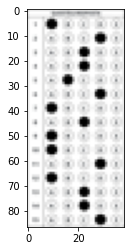

In [77]:
def gabarito_gen(batch_size = 64):
    # pasta das imagens de gabaritos
    source_path = cwd + "\\tests\\"
    image_files = [f for f in glob.glob(source_path + '*.png')]

    while True:
        # gerando imagens pretas no tamanho desejado
        X = np.zeros((batch_size, 256, 192, 3))
        Y = np.zeros((batch_size, 3))

        # preenchendo imagens
        for i in range(batch_size):
            for filepath in image_files:
                # lendo imagem e fazendo resize para (64, 64) e depois convertendo para array de numpy
                gabarito = Image.open(filepath)
                gabarito = gabarito.resize((39, 87))
                imgGabarito = np.asarray(gabarito)
                plt.imshow(imgGabarito)

                # resize no gabarito
                # size = np.random.randint(32, 64)
                temp_gabarito = gabarito.resize((39, 87))#(size, size)
                imgGabarito = np.asarray(temp_gabarito) / 255.
                gabarito_x, gabarito_y, _ = imgGabarito.shape

                # criar fundo preto da imagem
                bg = Image.new('RGB', (192, 256))

                # processo de geracao
                x1 = np.random.randint(1, 256 - gabarito_x)
                y1 = np.random.randint(1, 192 - gabarito_y)

                # colar imagem do gabarito sobre o fundo preto
                bg.paste(temp_gabarito, (x1, y1))
                # transformando em array de numpy
                gabarito = np.asarray(bg) / 255.
                X[i] = gabarito

                Y[i, 0] = x1 / 256.
                Y[i, 1] = y1 / 192.
                Y[i, 2] = gabarito_x / 256.
        yield X, Y

# chamando funcao de gerar gabaritos
x, y = next(gabarito_gen())

### gerando imagem com 2 gabaritos em um fundo preto

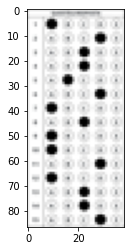

In [35]:
def gabarito_gen(batch_size = 64):
    # pasta das imagens de gabaritos
    source_path = cwd + "\\tests\\"
    image_files = [f for f in glob.glob(source_path + '*.png')]

    while True:
        # gerando imagens pretas no tamanho desejado
        X = np.zeros((batch_size, 256, 192, 3))
        Y = np.zeros((batch_size, 6))

        # preenchendo imagens
        for i in range(batch_size):
            for filepath in image_files:
                # lendo imagem e fazendo resize para (64, 64) e depois convertendo para array de numpy
                gabarito = Image.open(filepath)
                gabarito = gabarito.resize((39, 87))
                imgGabarito = np.asarray(gabarito)
                plt.imshow(imgGabarito)

                # resize no gabarito
                # size = np.random.randint(32, 64)
                temp_gabarito = gabarito.resize((39, 87))#(size, size)
                imgGabarito = np.asarray(temp_gabarito) / 255.
                gabarito_x, gabarito_y, _ = imgGabarito.shape

                # criar fundo preto da imagem
                bg = Image.new('RGB', (192, 256))

                # processo de geracao
                x1 = np.random.randint(1, 256 - gabarito_x)
                if(x1 + 39 > 148):
                    x2 = x1 - 43
                else:
                    x2 = x1 + 43
                y1 = np.random.randint(1, 192 - gabarito_y)
                y2 = y1 #np.random.randint(2, 192 - gabarito_y)

                # colar imagem do gabarito sobre o fundo preto
                bg.paste(temp_gabarito, (x1, y1))
                bg.paste(temp_gabarito, (x2, y2))
                # transformando em array de numpy
                gabarito = np.asarray(bg) / 255.
                X[i] = gabarito

                # posicao do gabarito 1
                Y[i, 0] = x1 / 256.
                Y[i, 1] = y1 / 192.
                Y[i, 2] = gabarito_x / 192.

                # posicao do gabarito 2
                Y[i, 3] = x2 / 256.
                Y[i, 4] = y2 / 192.
                Y[i, 5] = gabarito_x / 192.

        yield X, Y

# chamando funcao de gerar gabaritos
x_gabGen, y_gabGen = next(gabarito_gen())

<class 'numpy.ndarray'> 64 (64, 256, 192, 3)
<class 'numpy.ndarray'> 64 (64, 6)
[0.0078125  0.5625     0.453125   0.17578125 0.5625     0.453125  ]


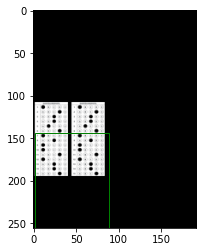

In [52]:
def plot_pred(img, p):
  fig, ax = plt.subplots(1)
  ax.imshow(img)
  rect = Rectangle(xy = (p[0] * 192, p[1] * 256), width = p[2] * 192, height = p[2] * 256, linewidth = 1,edgecolor = 'g',facecolor = 'none')
  rect2 = Rectangle(xy = (p[3] * 192, p[4] * 256), width = p[5] * 192, height = p[5] * 256, linewidth = 1,edgecolor = 'r',facecolor = 'none')
  ax.add_patch(rect)
  # ax.add_patch(rect2)
  plt.show()

# teste de plotagens
print(type(x_gabGen), len(x_gabGen), x_gabGen.shape)
print(type(y_gabGen), len(y_gabGen), y_gabGen.shape)
print(y_gabGen[0])
# plt.imshow(x_gabGen[10])
plot_pred(x_gabGen[0], y_gabGen[0])

### transferencia de aprendizado - lendo VGG pre-treinada e substituindo cabeçalho

In [15]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

vgg = tf.keras.applications.VGG16(input_shape=[192, 256, 3], include_top=False, weights='imagenet')
x = Flatten()(vgg.output)
x = Dense(6, activation='sigmoid')(x)
model2 = Model(vgg.input, x)
model2.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001))
model2.summary()


Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 192, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 192, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 192, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 96, 128, 64)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 96, 128, 128)      73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 96, 128, 128)      147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 48, 64, 128)      

### fazendo augumentation das imagens

In [203]:
aug = ImageDataGenerator(
	rotation_range=20, 
	# zoom_range=0.15,
	#width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
	# horizontal_flip=True, 
	# fill_mode="nearest"
	)

aug_iter = aug.flow(x_gabGen, y_gabGen, BATCH_SIZE)

x_aug = next(aug_iter)[0]

<class 'numpy.ndarray'> 64 (64, 256, 192, 3)


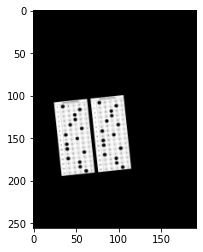

In [205]:
# verificando imagens modificadas
print(type(x_aug), len(x_aug), x_aug.shape)
plt.imshow(x_aug[1])

64 64
<class 'numpy.ndarray'> 128 (128, 256, 192, 3)
<class 'numpy.ndarray'> 128 (128, 3)
[0.55859375 0.76041667 0.33984375] [0.55859375 0.76041667 0.33984375]


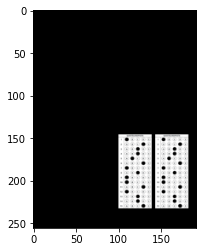

In [212]:
#juntando arrays (original e modificado) para utilizar no treino
x_appendArrays = np.concatenate((x_gabGen, x_aug), axis=0)
y_appendArrays = np.concatenate((y_gabGen, y_gabGen), axis=0) # pode estar errado pois o rotate em alguns exemplos modifica muito a posicao original
print(len(x_gabGen), len(x_aug))
print(type(x_appendArrays), len(x_appendArrays), x_appendArrays.shape)
print(type(y_appendArrays), len(y_appendArrays), y_appendArrays.shape)

# comparando
print(y_appendArrays[2], y_appendArrays[66])
plt.imshow(x_appendArrays[2])

### treinando modelo

Epoch 1/5
64/64 [==============================] - 2950s 46s/step - loss: 0.6952
Epoch 2/5
64/64 [==============================] - 2864s 45s/step - loss: 0.5974
Epoch 3/5
64/64 [==============================] - 2530s 40s/step - loss: 0.5978
Epoch 4/5
64/64 [==============================] - 2525s 39s/step - loss: 0.5963
Epoch 5/5
64/64 [==============================] - 2524s 39s/step - loss: 0.6011


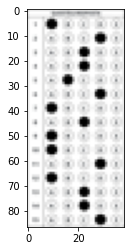

In [16]:
model2.fit_generator(gabarito_gen(), steps_per_epoch = EPOCH_SIZE, epochs = 5)

### salvando modelo

In [19]:
model2.save_weights('v2')

### carregando pesos treinados

In [3]:
model2.load_weights('v1')

### predizer a posição do gabarito na imagem

(None, 192, 256, 3)
(1, 256, 192, 3)
[[0.37121552 0.29697162 0.35847765 0.39089227 0.30660444 0.3442477 ]]


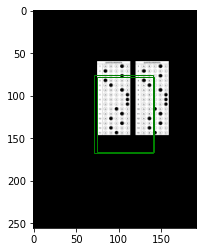

In [34]:
def plot_pred(img, p):
  fig, ax = plt.subplots(1)
  ax.imshow(img)
  rect = Rectangle(xy = (p[0] * 192, p[1] * 256), width = p[2] * 192, height = p[2] * 256, linewidth = 1,edgecolor = 'g',facecolor = 'none')
  rect2 = Rectangle(xy = (p[3] * 192, p[4] * 256), width = p[5] * 192, height = p[5] * 256, linewidth = 1,edgecolor = 'g',facecolor = 'none')
  ax.add_patch(rect)
  ax.add_patch(rect2)
  plt.show()

print(model2.get_config()["layers"][0]["config"]["batch_input_shape"])

# gerar imagem de teste
X = np.zeros((64, 192, 256, 3))
gabarito = Image.open('images/blog (20).png')
gabarito = gabarito.resize((39, 87))

bg = Image.new('RGB', (192, 256))
bg.paste(gabarito, (75, 60))
bg.paste(gabarito, (120, 60))
gabarito = np.asarray(bg) / 255.
X = gabarito
X = np.expand_dims(X, axis=0)
# x, _ = next(gabarito_gen())
# print(x.shape)
# print(x[0].shape)
print(X.shape)
# plt.imshow(X[0])
pred = model2.predict(X)
print(pred)
plot_pred(X[0], pred[0])

# img = x[50]
# p = pred[50]
# plot_pred(bg, pred)